# Homework 2

## ASTR 5900

# Problem 1

This homework will probe your data analysis skills and propagation of errors.

The file "data_points" that you can download from Canvas contains the X and Y positions of photons.  The image that they comprise consists of a non-uniform background, and a astronomical object.  

Your goal is to determine the net number of photons in the astronomical object and the uncertainty on that net number.

Hints:
 - You will probably want to create and work on a 2-d histogram representation of the data.  That can be accomplished using `plt.hist2d`.
 - You will probably want to create a model for the background.
 
The format of the data is a "pickle file".  That can be reconstituted to the x and y data points as below.

### $\textit{Answer}:$

In [101]:
## Initiate python stuff
## Execute twice to make sure it takes effect
%pylab inline
import numpy as np
import scipy.stats


fontsize = 20
figsize = (10,6)
dpi = 150

# Configure parameters
plt.rcParams.update({'font.size': fontsize, 'figure.figsize': figsize, 'figure.dpi': dpi})

# Default tick label size
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2

plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.linewidth'] = 2

Populating the interactive namespace from numpy and matplotlib


/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figsize']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [102]:
# Read in the data; this code was provided in the problem
import pickle
filename='data_points'
file=open(filename,'rb')
temp=pickle.load(file)

xdata=temp[0]
ydata=temp[1]



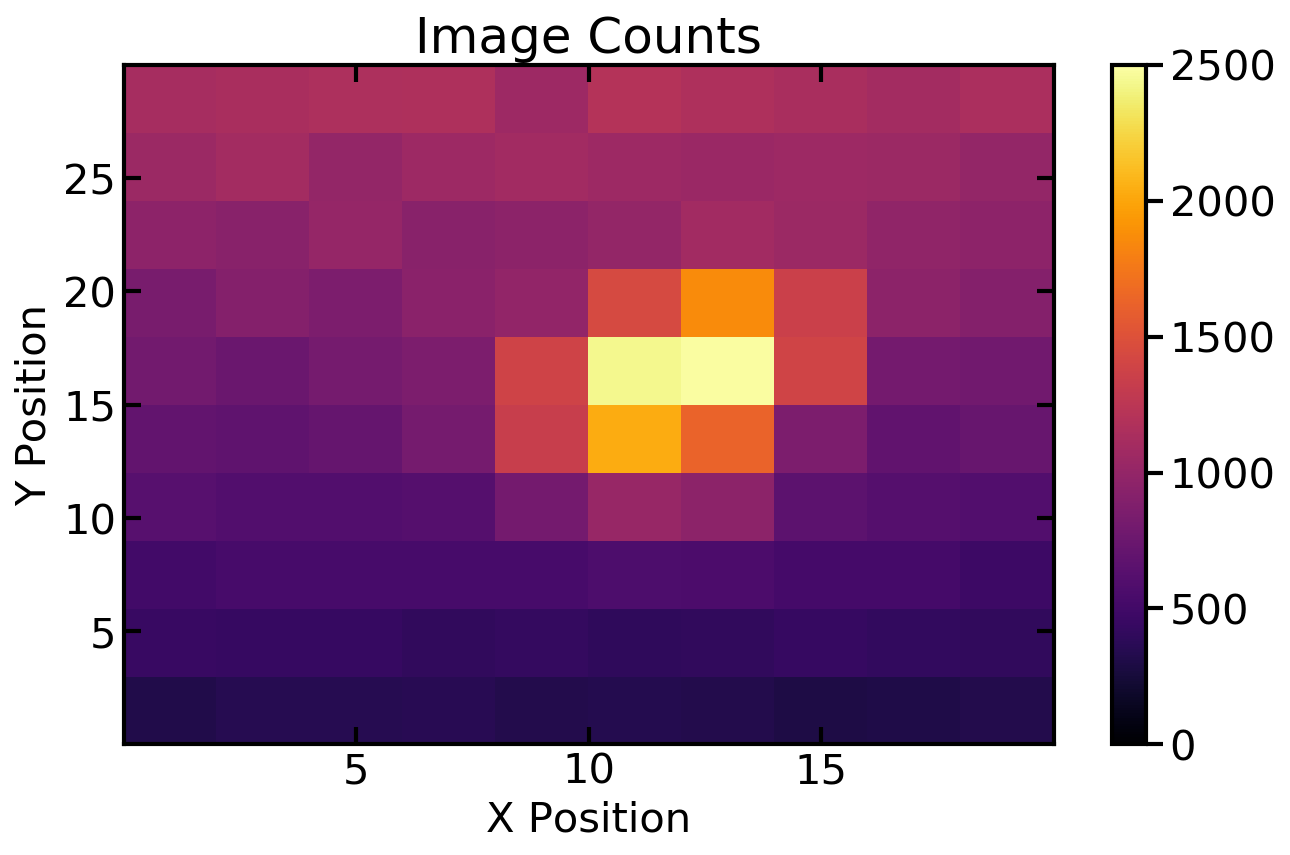

In [151]:
# Construct 2d histogram of the data 
plt.hist2d(xdata,ydata,cmap = 'inferno', vmin = 0, vmax = 2500)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.rcParams['ytick.direction'] = 'out'
plt.colorbar()
plt.title('Image Counts')
plt.show()

This is a visual depiction of the counts registered in each pixel. In our case, we have some astronomical source roughly centered at (10,15) surrounded by a nonuniform background that appears to increase in intensity along the y-axis. Our goal is to infer the number of counts coming from the astronomical object and their uncertainties.

To do this, we'll first have to model the background so we can subtract it from our data. Let's take a look at the of the histogram:

In [104]:
# Reconstruct the histogram (this time using nmumpy):
hist =  np.histogram2d(xdata,ydata)
data = hist[0]

print(data)

[[ 319.  443.  504.  630.  700.  797.  837.  964. 1051. 1115.]
 [ 347.  437.  529.  598.  674.  747.  902.  935. 1094. 1133.]
 [ 343.  437.  532.  596.  713.  819.  857. 1011. 1002. 1155.]
 [ 357.  407.  530.  617.  816.  850.  942.  929. 1059. 1169.]
 [ 332.  421.  528.  810. 1330. 1380.  993.  955. 1093. 1064.]
 [ 339.  395.  575. 1025. 2038. 2437. 1437.  997. 1059. 1209.]
 [ 331.  408.  559.  951. 1628. 2483. 1859. 1090. 1043. 1171.]
 [ 300.  431.  521.  662.  852. 1388. 1350. 1054. 1062. 1139.]
 [ 310.  418.  518.  623.  686.  810.  954.  981. 1045. 1098.]
 [ 323.  410.  470.  600.  723.  784.  904.  963.  999. 1147.]]


Each row in the above data set corresponds to a column in the above 2d histogram. As expected, we see that the counts increase gradually with position on the y-axis. Let's take a look at the y-axis values:

In [105]:
ybins = hist[2]
y_centers = 0.5*(ybins[:-1]+ybins[1:])
y_centers

array([ 1.50079115,  4.50069359,  7.50059602, 10.50049846, 13.50040089,
       16.50030333, 19.50020577, 22.5001082 , 25.50001064, 28.49991307])

The background looks roughly uniform along the y-axis; let's average together all of the y-values and plot the average count value versus y-axis position

Text(0, 0.5, 'Average Value')

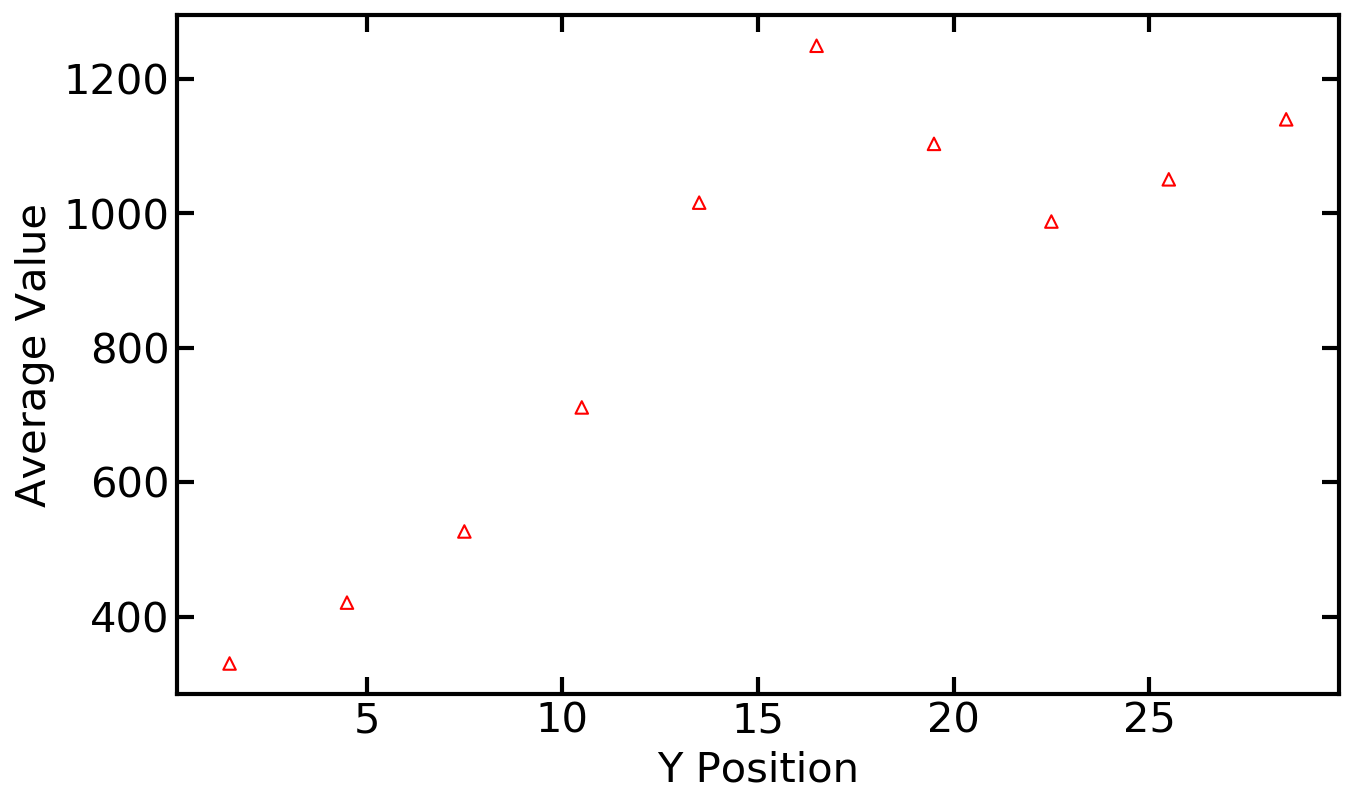

In [106]:
plt.rcParams['ytick.direction'] = 'in'
y_avg = np.mean(data, axis = 0)
plt.scatter(y_centers,y_avg, marker = '^', color = 'red', facecolor = 'none')
plt.xlabel('Y Position')
plt.ylabel('Average Value')

It looks like the counts increase linearily with the y-value. The exception to this is where the source is (from roughly y = 10 through y = 20). We'll exclude those regions and then fit a line to the background:

Text(0, 0.5, 'Average Value')

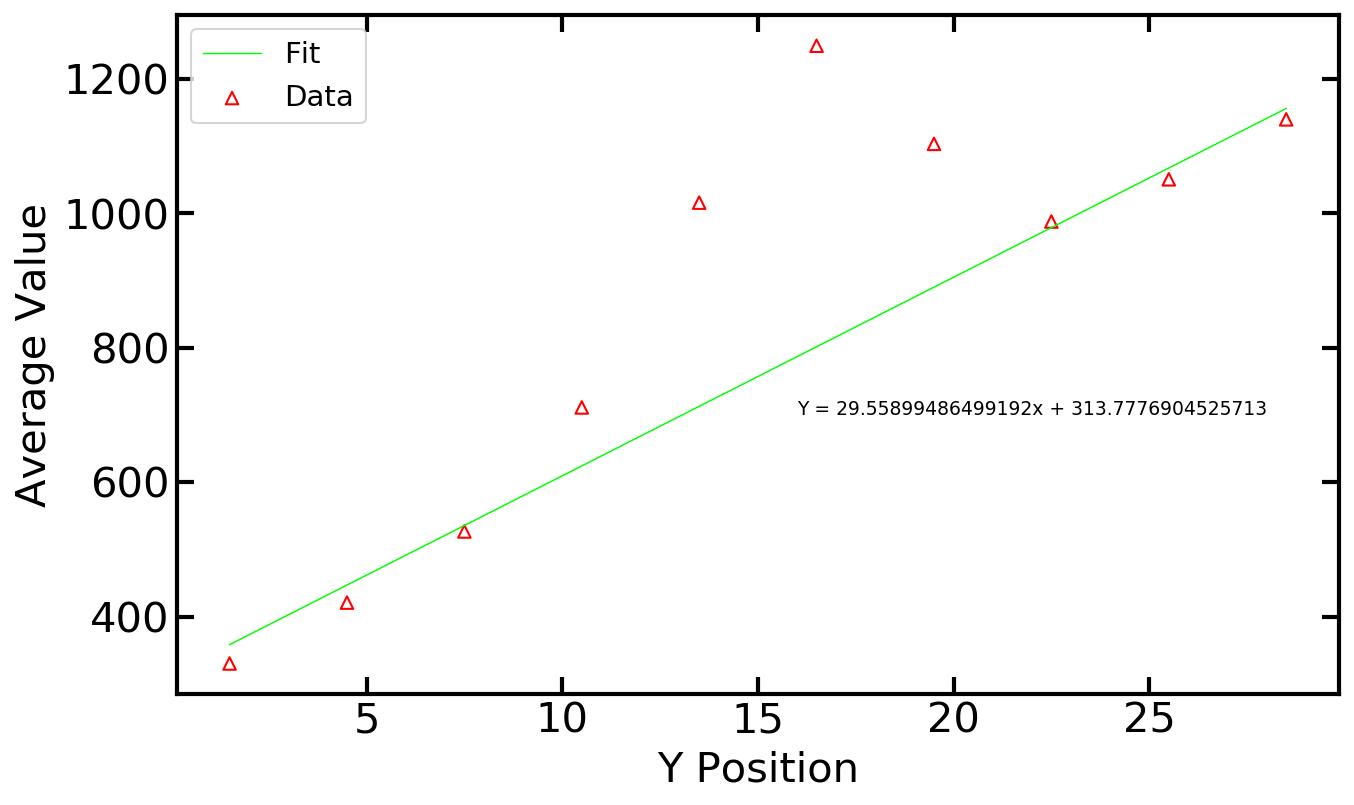

In [116]:
# Select regions away from the source:

cut_centers = np.append(y_centers[:4],y_centers[7:])
cut_y = np.append(y_avg[:4],y_avg[7:])

# Fit the sliced data
def func(m,y,b):
    return (m*y) + b

popt, pcov = scipy.optimize.curve_fit(func, cut_centers, cut_y)

# Plot
plt.figure(dpi = 150)
plt.scatter(y_centers,y_avg, marker = '^', color = 'red', facecolor = 'none', label = 'Data')
plt.plot(cut_centers, func(popt[0],cut_centers,popt[1]),label = 'Fit', color = 'lime',linewidth = '0.7')
plt.legend(fontsize = 14)
plt.text(16, 700, 'Y = '+ str(popt[0])+'x + ' + str(popt[1]), fontsize = 9) 
plt.xlabel('Y Position')
plt.ylabel('Average Value')


We now have a model for the background value as a function of Y. Let's construct the background:

In [117]:
background = np.zeros((len(data),len(data[0])))
background

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [139]:
for i in range(0,len(background)):
    for j in range(0,len(background[0])):
        background[i][j] = func(popt[0],y_centers[j],popt[1])
print(background)

[[ 358.13956832  446.81366902  535.48776973  624.16187043  712.83597113
   801.51007183  890.18417254  978.85827324 1067.53237394 1156.20647464]
 [ 358.13956832  446.81366902  535.48776973  624.16187043  712.83597113
   801.51007183  890.18417254  978.85827324 1067.53237394 1156.20647464]
 [ 358.13956832  446.81366902  535.48776973  624.16187043  712.83597113
   801.51007183  890.18417254  978.85827324 1067.53237394 1156.20647464]
 [ 358.13956832  446.81366902  535.48776973  624.16187043  712.83597113
   801.51007183  890.18417254  978.85827324 1067.53237394 1156.20647464]
 [ 358.13956832  446.81366902  535.48776973  624.16187043  712.83597113
   801.51007183  890.18417254  978.85827324 1067.53237394 1156.20647464]
 [ 358.13956832  446.81366902  535.48776973  624.16187043  712.83597113
   801.51007183  890.18417254  978.85827324 1067.53237394 1156.20647464]
 [ 358.13956832  446.81366902  535.48776973  624.16187043  712.83597113
   801.51007183  890.18417254  978.85827324 1067.53237394 

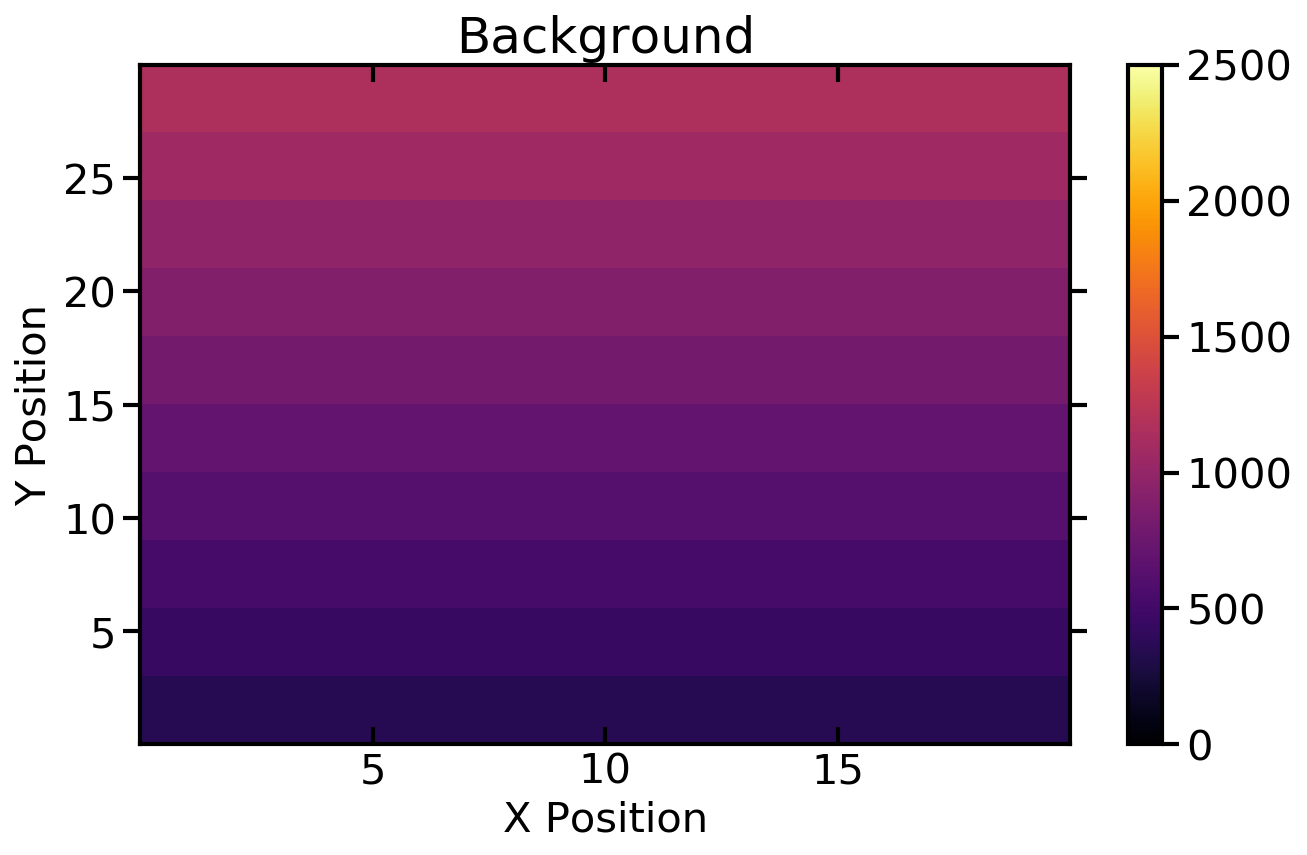

In [160]:
# Visual appearence of background
fig, ax = plt.subplots(1)
pc = ax.pcolorfast(hist[1], hist[2], np.transpose(background), cmap = 'inferno', vmin = 0, vmax = 2500)
fig.colorbar(pc)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Background')
plt.show()

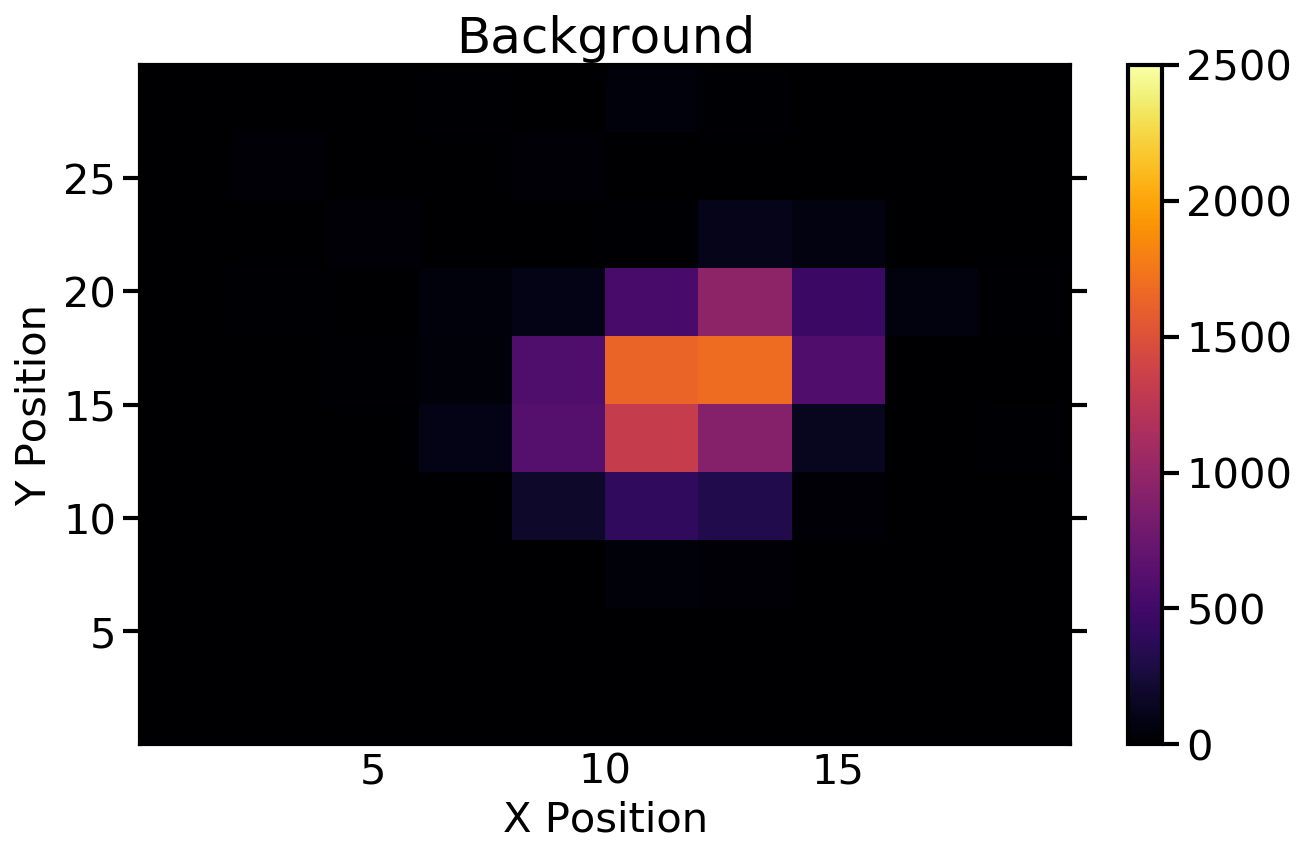

In [161]:
# Subtract background from image

sub = data - background

# Negative values non-physical, discard:
for i in range(0,len(background)):
    for j in range(0,len(background[0])):
        if sub[i][j] < 0:
            sub[i][j] = 0

fig, ax = plt.subplots(1)
pc = ax.pcolorfast(hist[1], hist[2], np.transpose(sub), cmap = 'inferno', vmin = 0, vmax = 2500)
fig.colorbar(pc)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Background')
plt.show()


In [165]:
# In matrix form:
print(sub)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 5.83812957e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.18158275e+01 0.00000000e+00
  2.64676261e+01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.64028869e-01 1.74899282e+01 0.00000000e+00 3.21417268e+01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.03164029e+02 4.84899282e+01 5.18158275e+01 0.00000000e+00
  0.00000000e+00 1.27935254e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.85838130e+02
  6.17164029e+02 5.78489928e+02 1.02815827e+02 0.00000000e+00
  2.54676261e+01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.95122303e+01 4.00838130e+02
  1.32516403e+03 1.63548993e+03 5.46815827e+02 1.81417268e+01
  0.00000000e+00 5.27935254e+01]
 [0.00000000e+00 0.00000000e+00 2.35122303e+01 3.26838130e

We now have our residual. We should be able to get the total counts from the source by summing up the counts of our residual. We'll assume the object is contained in the region from 

11277.343889348916

# Problem 2

In this problem we will be playing with bivariate Gaussian distributions.  Let's interpret the 2 random variables as the positions of 2 particles in a 1D well ($X_1, X_2$).

The mean and variance of the position of particle 1 is $\mu_1 = 3$, $\sigma^2_1 = 1.5$.  For particle 2 we have $\mu_2 = 2$ and $\sigma^2_2 = 5$.  The positions for both particles are distributed normally.

### Part A



Determine the probability that $-1 \leq x_1 \leq 3$ AND $ 1 \leq x_2 \leq 4$.  Assume the positions of the particles are distributed as described above, and that the random variables are independent.  Calculate this probability by sampling $10^4$ points from the relevant distribution(s), and finding the fraction of sampled points that meet the criteria.  Use routines from [`numpy.random` (this is a hyperlink)](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html) to sample.  Plot the sampled points on a simple scatter plot with `matplotlib.pyplot` (Plot $x_2$ vs $x_1$).

Note: remember the difference between variance and standard deviation.

### Part B

Calculate the probability of the same criteria, except now assume the positions are not independent (maybe the particles interact).  Use $\text{Cov}(X_1, X_2) = 3$.  Again there is a relevant `numpy.random` routine that will allow you to do the relevant sampling. Plot the sampled points.

Hint: This amounts to off-diagonal terms in the covariance matrix.  If you sampled from two independent 1D Gaussians in Part A, you should realize you can no longer do the same thing in this section.

### Part C

You should have received different answers in both parts (and why not?  the shapes of the plotted distributions are different).  Let's do something a little different now.

Rotate your original coordinate system such that the covariance matrix in Part B is diagonalized.  Either rotate your data in Part B in this manner or generate a new set of points from the diagonalized covariance.  If you choose the latter method, make sure you rotate the mean position too!

Now calculate the probability that $u_1 < 0$ AND $u_2 < 0$ where $\{u_i\}$ is your new coordinate system.

Finally, succinctly explain what $u_1, u_2$ are in terms of the original coordinates $x_1, x_2$.

You may have noticed you could have sampled the 'rotated positions' independently.  Rotating data such that their attributes are independent is the basis for principal components analysis, which we'll cover later.